In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
#from scipy.integrate import ode45

from PIL import Image
import io

In [4]:
def alpha_m(v):
    if abs(v+54)>1.0e-8:
        alpha_m = 0.32*(v+54)/(1-np.exp(-(v+54)/4))
    else:
        alpha_m=1
    return alpha_m

def beta_m(v):
    beta_m = 0.28*(v+27)/(np.exp((v+27)/5)-1)
    return beta_m

In [5]:
def alpha_n(v):
    if abs(v+52)>1.0e-8:
        alpha_n = 0.032*(v+52)/(1-np.exp(-(v+52)/5))
    else:
        alpha_n=0.32
    return alpha_n

def beta_n(v):
    beta_n = 0.5*np.exp(-(v+57)/40)
    return beta_n

In [6]:
def m_inf(v):
    return alpha_m(v) / (alpha_m(v)+beta_m(v))

def n_inf(v):
    return alpha_n(v)/(alpha_n(v)+beta_n(v))

def tau_n(v):
    return 1/(alpha_n(v)+beta_n(v))

In [7]:
def HodgkinHuxley_2D(t, y, C=1, v_Na = 50, v_K=-100, v_L = -67, g_Na=100, g_K=80, g_L=0.1, I_app = 1.5):
    v = y[0]
    n = y[1]

    dvdt = ( g_Na * m_inf(v)**3 * (0.83 - n) * (v_Na - v) + g_K * n**4*(v_K - v) + g_L * (v_L - v) + I_app ) / C
    dndt = (n_inf(v) - n) / tau_n(v)

    return np.array([dvdt, dndt])

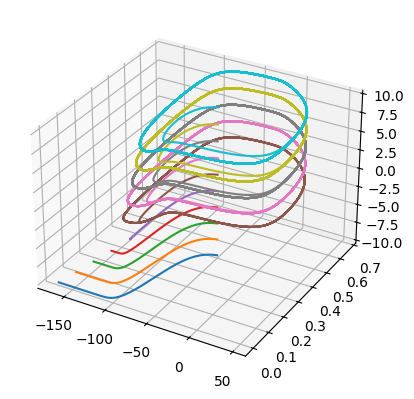

In [8]:
# Create 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t_span = [0,100]
y0 = np.array([ -50, 0.4 ])
I_app_list = np.linspace(-10,10,10)

for I_app in I_app_list:
    soln = solve_ivp(lambda t,v: HodgkinHuxley_2D(t,v,I_app=I_app), t_span, y0, rtol=1e-8, atol=1e-6)
    ax.plot(soln.y[0],soln.y[1],I_app)

plt.show()


In [13]:
t_span = [0, 100]
y0 = np.array([-50, 0.4])
I_app_list = np.linspace(-10, 10, 20)

# Prepare to collect GIF frames
frames = []

# Generate frames
for i, I_app in enumerate(I_app_list):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Integrate and plot
    soln = solve_ivp(lambda t, v: HodgkinHuxley_2D(t, v, I_app=I_app), t_span, y0, rtol=1e-8, atol=1e-6)
    ax.plot(soln.y[0], soln.y[1], soln.t, color='blue')

    ax.set_xlim(-100, 100)
    ax.set_ylim(-2, 2)
    ax.set_zlim(t_span[0], t_span[1])
    ax.set_xlabel('V')
    ax.set_ylabel('n')
    ax.set_zlabel('Time')
    ax.set_title(f'I_app = {I_app:.2f}')

    # Render to image in memory
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    frames.append(Image.open(buf).convert('P'))

# Save animation
file_path= r'C:\Users\Colton\OneDrive\Documents\MATLAB\MATH572\FinalProject\hh_3d_animation.gif'
frames[0].save(
    file_path,
    save_all=True,
    append_images=frames[1:],
    duration=200,  # milliseconds
    loop=0
)

print("GIF saved as hh_3d_animation.gif")


GIF saved as hh_3d_animation.gif
